# **Here, to find the best number of clustering to define a relationship between**
#**(Age Vs. Spending Score)**

In [3]:
#First, connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# load data
data = pd.read_csv("/content/drive/My Drive/Cluster/Mall_Customers.csv")
# show data head
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **As we see above, we have 4 featurs, but we don't have target. Unsupervised learning is where you only have input data (X) and no corresponding output variables, so the target variable will vary depending on the business goal and available data.**

# **K- means Clustering**

 **Here i want to take the coulmn number 2 and the coulmn number 4 (Age) & (Spending score) and cluster them.**

In [5]:
# 2 is the age column, 4 is the Spending Score colmn
X = data.iloc[:, 2:4].values

# **Extra: The Elbow method**

In [6]:
from sklearn.cluster import KMeans
wcss =[]
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

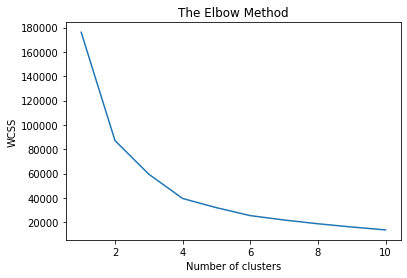

In [7]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:

kmeans=KMeans(n_clusters= 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)


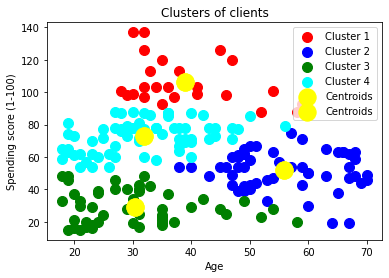

In [9]:

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],s = 100, c='red', label = 'Cluster 1')

plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s = 100, c='blue', label = 'Cluster 2')

plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],s = 100, c='green', label = 'Cluster 3')

plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3,1],s = 100, c='cyan', label = 'Cluster 4')



plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
    
plt.title('Clusters of clients')
plt.xlabel('Age')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()
    


# **Silhouette coefficient**

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
for n_clusters in range(2,7):
# Initialize the clusterer with n_clusters value
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.42620850066216065
For n_clusters = 3 The average silhouette_score is : 0.4254725038202792
For n_clusters = 4 The average silhouette_score is : 0.43254558458212583
For n_clusters = 5 The average silhouette_score is : 0.40157587536205724
For n_clusters = 6 The average silhouette_score is : 0.3959805131239844


[[ 55.81481481  51.77777778]
 [ 39.         106.5       ]
 [ 30.34693878  29.26530612]
 [ 31.95890411  72.95890411]]
[2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2
 2 2 2 0 2 0 2 0 2 0 2 2 2 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0
 0 3 0 0 3 0 0 0 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 3 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


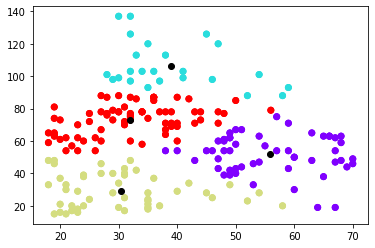

In [11]:
import matplotlib.pyplot as plt
data = data.iloc[:, 2:4].values
# KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)
print(kmeans.cluster_centers_)
print(kmeans.labels_)

plt.scatter(data[:,0],data[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(data[:,0], data[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.show()

# **Agglomerative Clustering**

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv("/content/drive/My Drive/Cluster/Mall_Customers.csv")
# show data head
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


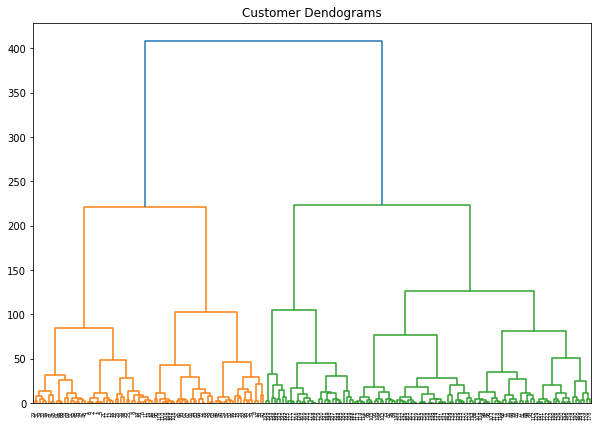

In [13]:

data = data.iloc[:, 2:4].values
import scipy.cluster.hierarchy as shc
# plot dendograms
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))


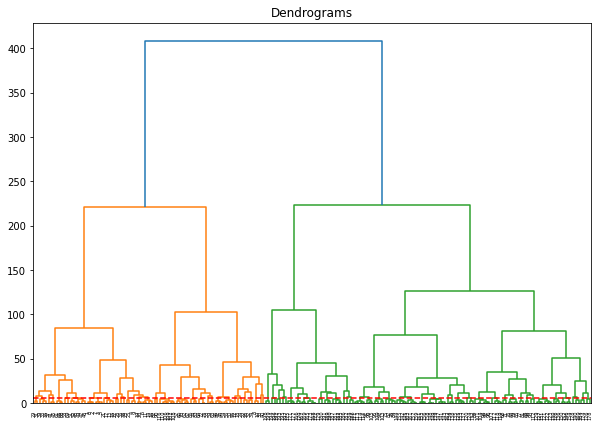

In [14]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [15]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       0, 1, 3, 3, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

 **We can see above the values of 0s, 1s, 3s, and 4s, in the output since we defined 4** **clusters. 0 represents the points that belong to the first cluster and 1 represents points in the second cluster and so go on.**

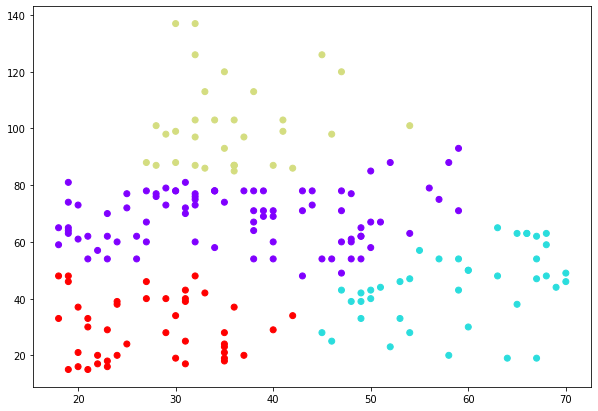

In [16]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
plt.show()

In [17]:
# To select the best number of k
for n_clusters in range(2,7):
    # Initialize the clusterer with n_clusters value
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(data)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(data, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.4104652474372429
For n_clusters = 3 The average silhouette_score is : 0.33551603786375067
For n_clusters = 4 The average silhouette_score is : 0.3841357046286839
For n_clusters = 5 The average silhouette_score is : 0.36930163803129956
For n_clusters = 6 The average silhouette_score is : 0.3763491738318196


In [18]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

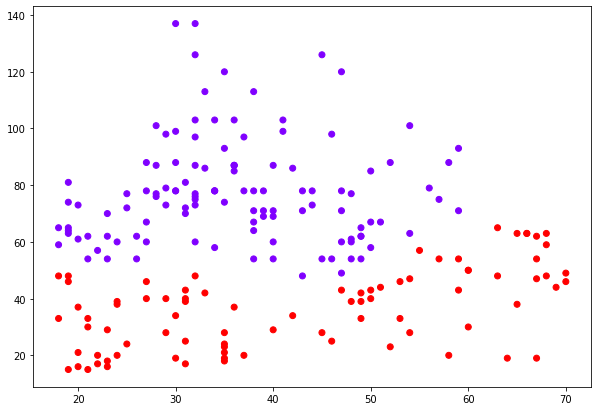

In [19]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
plt.show()